In [1]:
import numpy as np
from scipy.sparse import csr_matrix
from paralleltomo import paralleltomo
from PIL import Image
import matplotlib.pyplot as plt
import math

/Users/karlfindhansen/Documents/GitHub/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


In [2]:
path = "/Users/karlfindhansen/Desktop/MathModellingDTU/Exam Project/testImage.npy"

(5000, 5000)


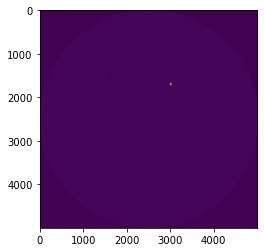

In [3]:
im = np.load(path)
print(im.shape)

plt.imshow(im)
plt.show()

In [4]:
N=8
theta = np.matrix([45.0000,   67.5000,   90.0000,  112.5000,  135.0000,  157.5000,  180.0000,  202.5000,  225.0000,  247.5000,  270.0000, 292.5000,  315.0000])
[A,theta,p,d] = paralleltomo(N,theta,11)

# print([A,theta,p,d])
print(f"A = {A}")
print(np.linalg.matrix_rank(A),A.shape[0])
print()

N=200
theta =np.matrix(np.linspace(0,179,179))
p = 250
[A,theta,p,d] = paralleltomo(N,theta,p)
print(f"A = {A}")
# print([A,theta,p,d])

A = [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.13137085 0.         0.        ]
 [0.         0.         0.         ... 0.         0.84852814 0.56568542]
 [0.         0.         0.         ... 0.         0.         0.        ]]
63 143



/Users/karlfindhansen/Documents/GitHub/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


A = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Problem 1

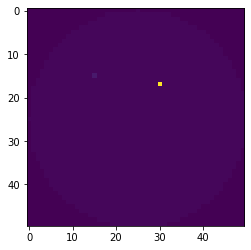

In [15]:
# make the resolution of im to 50 x 50
resized_im = im[::100,::100]
plt.imshow(resized_im)  
plt.show()

#save resized im
np.save('resized_im', resized_im)

In [12]:
# calculating the A matrix
N = 50
p = 50
theta = np.matrix(np.linspace(0,179,179))
[A,theta,p,d] = paralleltomo(N, theta, p)
print(np.linalg.matrix_rank(A),A.shape)

print(f"A = {A}")

/Users/karlfindhansen/Documents/GitHub/MathModellingDTU/Exam Project/paralleltomo.py:102: RuntimeWarning: divide by zero encountered in true_divide
  tx = (x - x0theta[j,0])/a


2500 (8950, 2500)
A = [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Simulating forward projection

In [13]:
def calculatingB(A, resized_im):
    x = np.ravel(resized_im)
    b = np.matmul(A,x)
    return b

b = calculatingB(A, resized_im)
# x with no noise
x_no_Noise = np.linalg.lstsq(A, b)[0]
resized_no_noise_im = np.resize(x_no_Noise, (50,50))
np.save("x_no_noise.npy", resized_im)

# adding noise from mean and stanard deviation
def addNoise(b):
    mean = np.mean(b)
    std = np.std(b)

    noise = np.random.normal(mean, std, b.shape)
    noisy_b = b + noise
    return noisy_b

noisy_b = addNoise(b)
x_noisy = np.linalg.lstsq(A, noisy_b)[0]
resized_no_noise_im = np.resize(x_noisy, (50,50))
np.save("x_with_noise.npy", resized_im)



/var/folders/r2/gzlv5h7s47398gkvjzzqmmfr0000gn/T/ipykernel_62837/1429547320.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_no_Noise = np.linalg.lstsq(A, b)[0]
/var/folders/r2/gzlv5h7s47398gkvjzzqmmfr0000gn/T/ipykernel_62837/1429547320.py:22: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_noisy = np.linalg.lstsq(A, noisy_b)[0]


# Comparing images

TypeError: Invalid shape (2500,) for image data

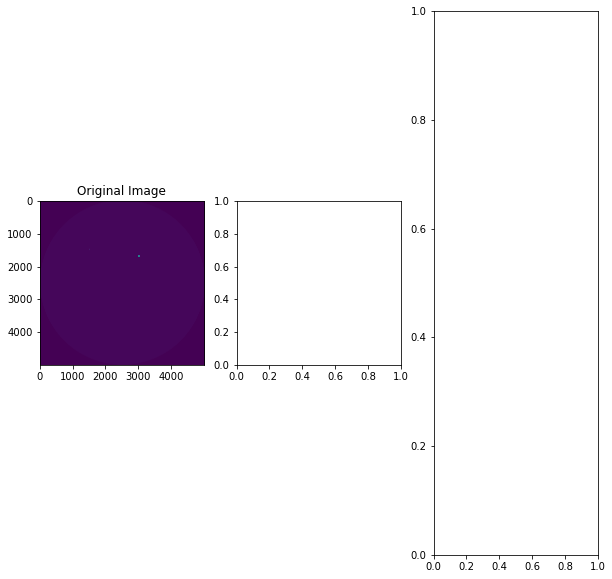

In [14]:
# make a subplot of the three images

original_image = np.load("testImage.npy")
resized_im = np.load("resized_im.npy")
x_no_Noise = np.load("x_no_noise.npy")
x_noisy = np.load("x_with_noise.npy")

# make subplot of the 4 images
def subplot(original_image, resized_im, x_no_Noise, x_noisy):
    fig, axs = plt.subplots(1, 4, figsize=(10, 10))
    axs[0].imshow(original_image)
    axs[0].set_title("Original Image")
    axs[1].imshow(resized_im)
    axs[1].set_title("Resized image")
    axs[2].imshow(x_no_Noise)
    axs[2].set_title("Recreated image (using b without noise)")
    axs[3].imshow(x_noisy)
    axs[3].set_title("Recreated image (using b with noise)")
    plt.show()


subplot(original_image, resized_im, x_no_Noise, x_noisy)